<a href="https://colab.research.google.com/github/VarunKoduru/ML-Assignment-1-185/blob/main/MLassignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. **Regression**

In [ ]:
# Q(a)
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("pimaindiansdiabetes.csv")
print(data.head())
print(data.info())

X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [ ]:
# Q(b)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")

Train size: 614, Test size: 154


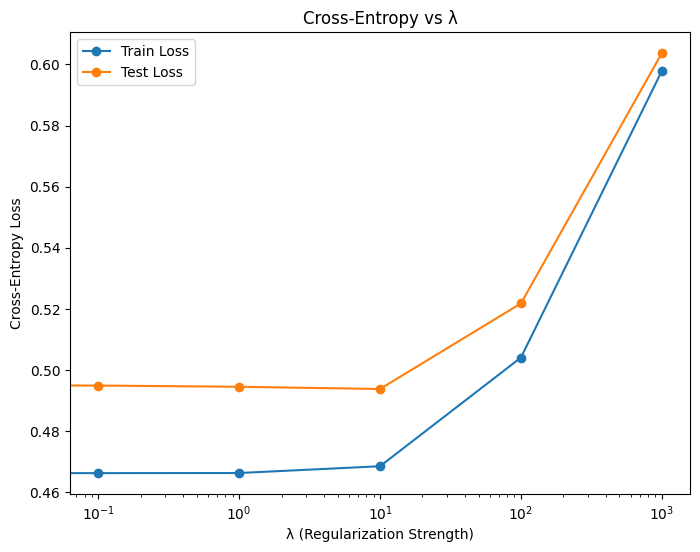

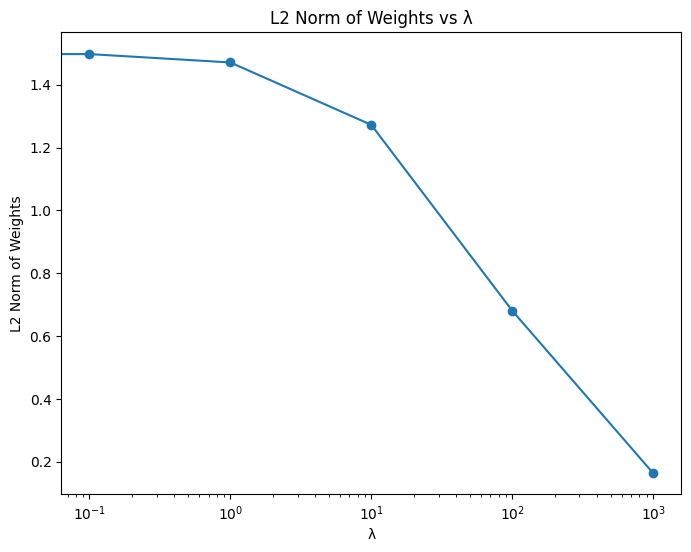

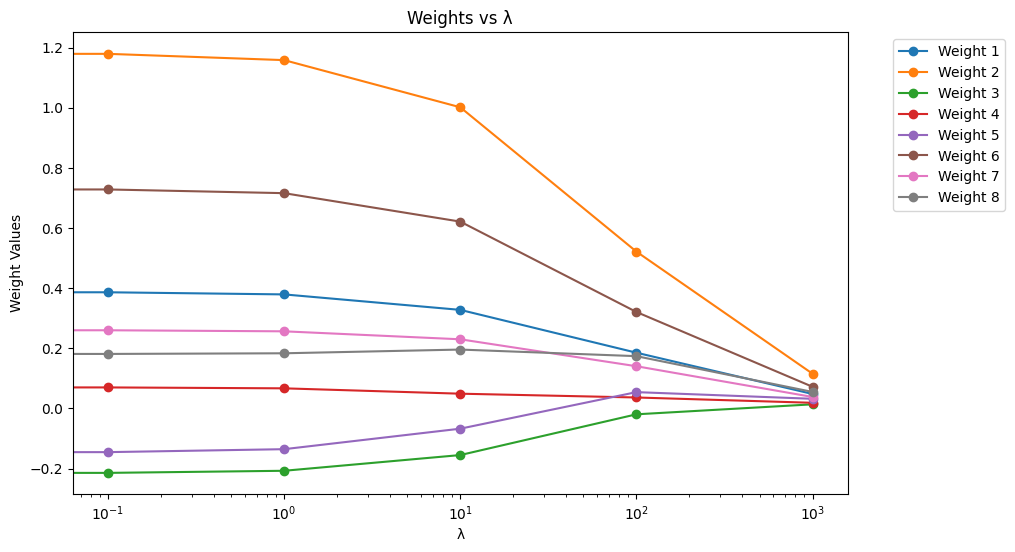

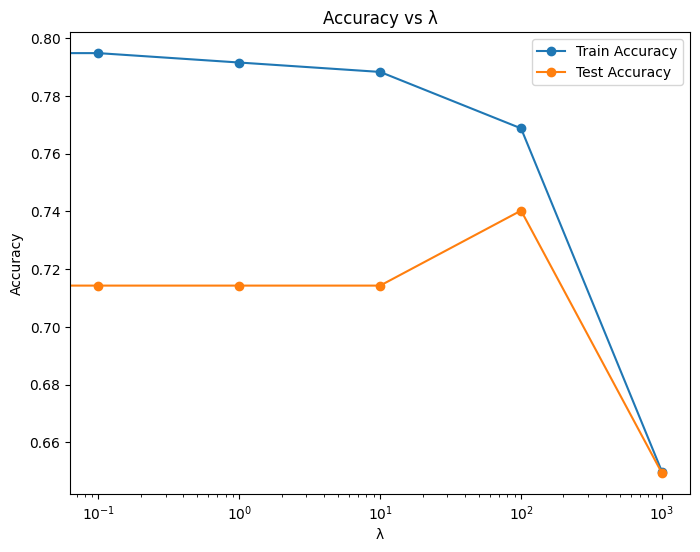

In [ ]:
# Q(c,d)
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

lambdas = [0, 0.1, 1, 10, 100, 1000]
train_losses, test_losses = [], []
weight_norms, accuracies_train, accuracies_test = [], [], []
all_weights = []

for lam in lambdas:
    if lam == 0:
        model = LogisticRegression(penalty=None, max_iter=1000)
    else:
        model = LogisticRegression(penalty='l2', C=1/lam, max_iter=1000)

    model.fit(X_train, y_train)

    y_train_pred = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict_proba(X_test)[:, 1]

    train_losses.append(log_loss(y_train, y_train_pred))
    test_losses.append(log_loss(y_test, y_test_pred))

    weight_norms.append(np.linalg.norm(model.coef_))

    accuracies_train.append(accuracy_score(y_train, model.predict(X_train)))
    accuracies_test.append(accuracy_score(y_test, model.predict(X_test)))

    all_weights.append(model.coef_.flatten())

all_weights = np.array(all_weights)

# Plot Cross-Entropy
plt.figure(figsize=(8,6))
plt.plot(lambdas, train_losses, marker='o', label="Train Loss")
plt.plot(lambdas, test_losses, marker='o', label="Test Loss")
plt.xscale('log')
plt.xlabel("λ (Regularization Strength)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Cross-Entropy vs λ")
plt.legend()
plt.show()

# Plot L2 Norm of Weights
plt.figure(figsize=(8,6))
plt.plot(lambdas, weight_norms, marker='o')
plt.xscale('log')
plt.xlabel("λ")
plt.ylabel("L2 Norm of Weights")
plt.title("L2 Norm of Weights vs λ")
plt.show()

# Plot Weight Values
plt.figure(figsize=(10,6))
for i in range(all_weights.shape[1]):
    plt.plot(lambdas, all_weights[:, i], marker='o', label=f'Weight {i+1}')
plt.xscale('log')
plt.xlabel("λ")
plt.ylabel("Weight Values")
plt.title("Weights vs λ")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot Accuracy
plt.figure(figsize=(8,6))
plt.plot(lambdas, accuracies_train, marker='o', label="Train Accuracy")
plt.plot(lambdas, accuracies_test, marker='o', label="Test Accuracy")
plt.xscale('log')
plt.xlabel("λ")
plt.ylabel("Accuracy")
plt.title("Accuracy vs λ")
plt.legend()
plt.show()

In [ ]:
# Q(e)
def gaussian_basis(x, centers, sigma):
    return np.exp(- (x - centers)**2 / (2 * sigma**2))

def transform_with_gaussians(X, sigma, num_centers=5):
    transformed = []
    centers = np.linspace(-10, 10, num_centers)
    for i in range(X.shape[1]):
        for c in centers:
            transformed.append(gaussian_basis(X[:, i], c, sigma))
    return np.column_stack(transformed)

sigmas = [0.1, 0.5, 1, 5, 10]

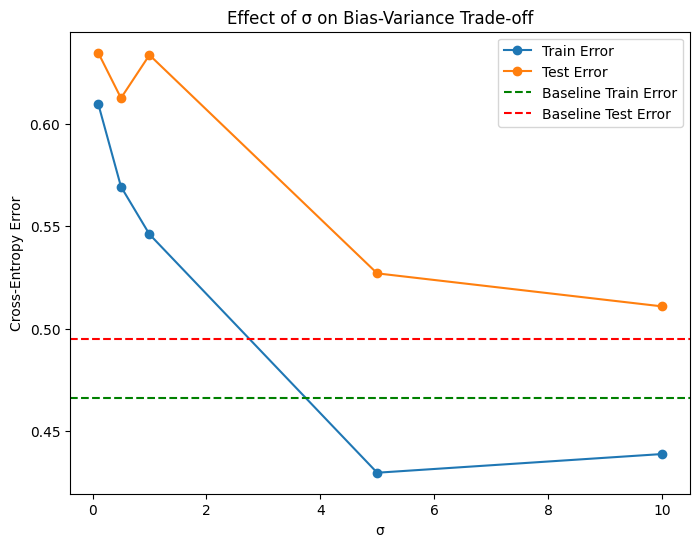

In [ ]:
# Q(f)
# Baseline model
baseline_model = LogisticRegression(penalty=None, max_iter=1000).fit(X_train, y_train)
baseline_train_error = log_loss(y_train, baseline_model.predict_proba(X_train)[:,1])
baseline_test_error = log_loss(y_test, baseline_model.predict_proba(X_test)[:,1])

train_errors, test_errors = [], []

for sigma in sigmas:
    X_train_trans = transform_with_gaussians(X_train, sigma)
    X_test_trans = transform_with_gaussians(X_test, sigma)

    model = LogisticRegression(penalty=None, max_iter=1000)
    model.fit(X_train_trans, y_train)

    train_errors.append(log_loss(y_train, model.predict_proba(X_train_trans)[:,1]))
    test_errors.append(log_loss(y_test, model.predict_proba(X_test_trans)[:,1]))

# Plot
plt.figure(figsize=(8,6))
plt.plot(sigmas, train_errors, marker='o', label="Train Error")
plt.plot(sigmas, test_errors, marker='o', label="Test Error")
plt.axhline(y=baseline_train_error, color='green', linestyle='--', label="Baseline Train Error")
plt.axhline(y=baseline_test_error, color='red', linestyle='--', label="Baseline Test Error")
plt.xlabel("σ")
plt.ylabel("Cross-Entropy Error")
plt.title("Effect of σ on Bias-Variance Trade-off")
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


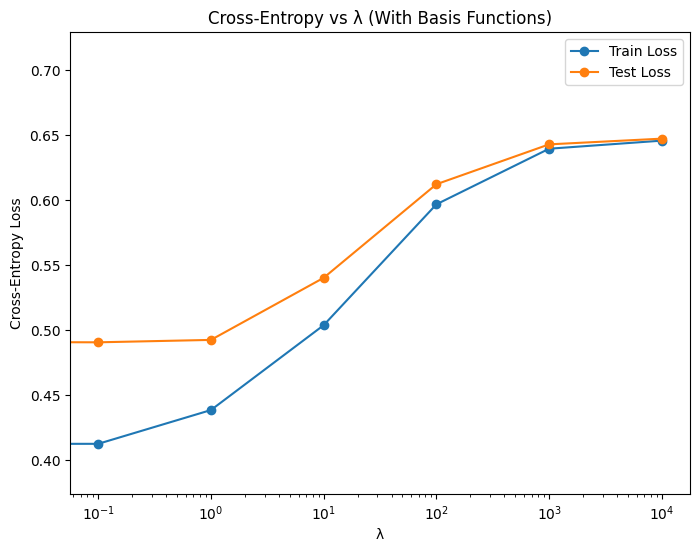

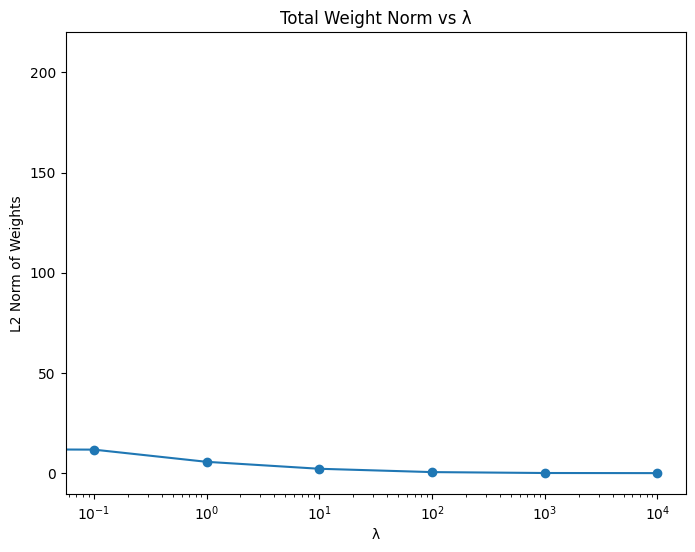

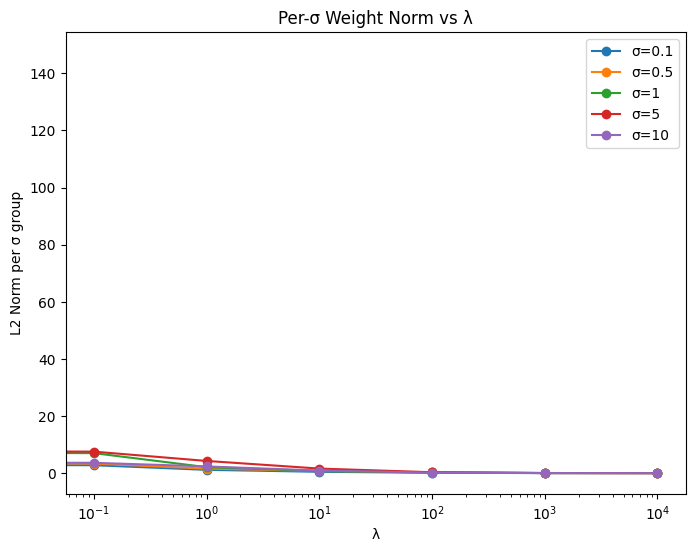

In [ ]:
# Q(g)
lambda_values = [0, 0.1, 1, 10, 100, 1000, 10000]

def full_gaussian_transform(X, sigmas):
    transformed = []
    for sigma in sigmas:
        transformed.append(transform_with_gaussians(X, sigma))
    return np.hstack(transformed)

X_train_full = full_gaussian_transform(X_train, sigmas)
X_test_full = full_gaussian_transform(X_test, sigmas)

train_losses_all, test_losses_all = [], []
weight_norms_all = []
sigma_weight_norms = {sigma: [] for sigma in sigmas}

num_features = X_train.shape[1] * 5
for lam in lambda_values:
    if lam == 0:
        model = LogisticRegression(penalty=None, max_iter=1000)
    else:
        model = LogisticRegression(penalty='l2', C=1/lam, max_iter=1000)

    model.fit(X_train_full, y_train)

    train_losses_all.append(log_loss(y_train, model.predict_proba(X_train_full)[:,1]))
    test_losses_all.append(log_loss(y_test, model.predict_proba(X_test_full)[:,1]))

    weight_norms_all.append(np.linalg.norm(model.coef_))

    for i, sigma in enumerate(sigmas):
        start = i * num_features
        end = start + num_features
        sigma_weight_norms[sigma].append(np.linalg.norm(model.coef_[:, start:end]))

# Plot Cross-Entropy vs λ
plt.figure(figsize=(8,6))
plt.plot(lambda_values, train_losses_all, marker='o', label="Train Loss")
plt.plot(lambda_values, test_losses_all, marker='o', label="Test Loss")
plt.xscale('log')
plt.xlabel("λ")
plt.ylabel("Cross-Entropy Loss")
plt.title("Cross-Entropy vs λ (With Basis Functions)")
plt.legend()
plt.show()

# Plot Total Weight Norm vs λ
plt.figure(figsize=(8,6))
plt.plot(lambda_values, weight_norms_all, marker='o')
plt.xscale('log')
plt.xlabel("λ")
plt.ylabel("L2 Norm of Weights")
plt.title("Total Weight Norm vs λ")
plt.show()

# Plot Per-Sigma Weight Norms
plt.figure(figsize=(8,6))
for sigma in sigmas:
    plt.plot(lambda_values, sigma_weight_norms[sigma], marker='o', label=f"σ={sigma}")
plt.xscale('log')
plt.xlabel("λ")
plt.ylabel("L2 Norm per σ group")
plt.title("Per-σ Weight Norm vs λ")
plt.legend()
plt.show()

**Q(h) Designing Basis Functions for Feature Relationships**

Theory Only:

Use multivariate Gaussian basis functions:

𝜙𝑗(𝑥)=exp(−(𝑥−𝜇𝑗)^𝑇(𝑥−𝜇𝑗)/2𝜎^2)

Captures interactions between multiple features.

Impact:

Lower bias (captures complex relationships).

Higher variance (many parameters → overfitting risk).

Needs stronger regularization.

**Q(i) Adaptive Basis Placement Algorithm**

Theory + Outline:

Initialize centers μ randomly.

Iteratively:

Fix μ → update w using logistic regression with L2 penalty.

Fix w → update μ using gradient descent.

Repeat until convergence.

This resembles an EM-like algorithm.

**Q(j) Convergence Analysis**

Theory Only:

The optimization is non-convex → algorithm converges to local optima, not guaranteed global optima.

Sensitive to initialization of μ.

Multiple random restarts can improve solution quality.

# **2.Linear REGRESSION,logistic regression (CLASSIFICATION)**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("housing.csv")  # Use full path if needed

# Display basic info
print("Shape of dataset:", df.shape)
print(df.head())
print(df.info())

Shape of dataset: (20640, 10)
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [ ]:
# Separate features and target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [ ]:
# Fill missing values
X["total_bedrooms"].fillna(X["total_bedrooms"].median(), inplace=True)

/tmp/ipython-input-1488676159.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["total_bedrooms"].fillna(X["total_bedrooms"].median(), inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = ['ocean_proximity']
numerical_features = [col for col in X.columns if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = lin_reg.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression - MSE:", mse)
print("Linear Regression - R² Score:", r2)

Linear Regression - MSE: 4908476721.156617
Linear Regression - R² Score: 0.6254240620553605


2. Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)  # alpha is the regularization strength
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression - MSE:", mse_ridge)
print("Ridge Regression - R² Score:", r2_ridge)

Ridge Regression - MSE: 4911716687.698615
Ridge Regression - R² Score: 0.6251768135554039


3. Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression - MSE:", mse_lasso)
print("Lasso Regression - R² Score:", r2_lasso)

Lasso Regression - MSE: 4908476875.0729885
Lasso Regression - R² Score: 0.6254240503096862


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.263e+12, tolerance: 2.207e+10
  model = cd_fast.enet_coordinate_descent(


3. Visualize Predictions

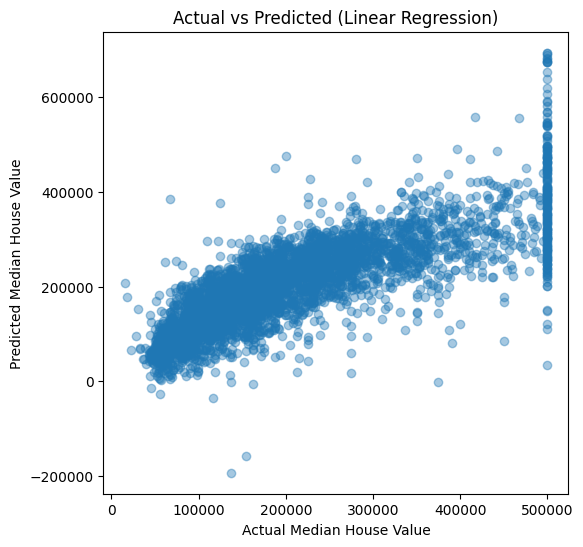

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()